# Lead Scoring Case Study

## Problem statement
X Education, an online course provider, faces a challenge of low lead conversion rates despite a substantial influx of leads from various sources, including website visitors, forms, and referrals. While the company actively engages potential customers through sales efforts, the current lead conversion rate of approximately 30% is below the desired level. The company aims to improve lead conversion efficiency by identifying and prioritizing the most promising leads (so called hot leads), thus increasing the conversion rate to meet the target of 80%.

## Businss Goal
- The primary objective of X Education is to enhance its lead conversion process and achieve a higher conversion rate of 80%. 
- Additionally, a lead score between 0-100 should be assigned to each lead in order to identify hot leads
- The company seeks to optimize its resources by focusing on leads with the highest potential for conversion, enabling the sales team to engage in more effective communication strategies. 
- By implementing a logistic regression model, X Education aims to assign lead scores that reflect the likelihood of conversion, allowing the sales team to prioritize leads and allocate resources efficiently. 


In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Import and Inspect Data set

In [3]:
Leads_data=pd.read_csv("Leads.csv")

In [4]:
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Leads_data.shape

(9240, 37)

In [6]:
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data Cleaning

### 2.1. "Select" values

In [8]:
# Replace select values with nan
Leads_data= Leads_data.replace("Select", np.nan )

### 2.2. Null values

In [9]:
# Dealing with null values
# Calculating the null precentages per variable
round(Leads_data.isnull().sum().sort_values(ascending=False)/len(Leads_data.index),2)*100

How did you hear about X Education               78.0
Lead Profile                                     74.0
Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Activity Index                      46.0
Asymmetrique Profile Index                       46.0
City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Lead Source                                       0.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount th

#### Drop Columns with more than 40% missing values

In [10]:

Leads_data= Leads_data.drop(columns=["How did you hear about X Education", "Lead Quality","Lead Profile","Asymmetrique Activity Index",
                             "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"])

In [11]:
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Dealing with null values below 40%

In [12]:
# Calculating the null precentages per variable
round(Leads_data.isnull().sum().sort_values(ascending=False)/len(Leads_data.index),2)*100

City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Lead Source                                       0.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
Prospect ID                                       0.0
Newspaper                                         0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Digital Advertisement       

In [13]:
# 1. "City"
Leads_data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
# Impute null values with "Unkown"
Leads_data.City=Leads_data.City.fillna("Unknown")

In [15]:
# Check if it worked
Leads_data.City.value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
# 2."Specialization"
Leads_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
# Impute null valus with "Unkown" as some people might not (yet) have a specialization
Leads_data.Specialization=Leads_data.Specialization.fillna("Unknown")

In [18]:
# Check if it worked
Leads_data.Specialization.value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# 3. "Tags"
Leads_data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
# Impute with "Others"
Leads_data.Tags=Leads_data.Tags.fillna("Others")

In [21]:
# Check
Leads_data.Tags.value_counts()

Others                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [22]:
# 4. "What matters most to you in choosing a course"
Leads_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# Due to the highly scewed data we will drop this column
Leads_data=Leads_data.drop(columns=["What matters most to you in choosing a course"])

In [24]:
# 5. "What is your current occupation"
Leads_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# Impute with "Unemployed"
Leads_data["What is your current occupation"]=Leads_data["What is your current occupation"].fillna("Unemployed")

In [26]:
# 6. "Country"
Leads_data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [27]:
# We will drop this column as data is skewed
Leads_data=Leads_data.drop(columns=["Country"])

In [28]:
# Check null value percentage again
round(Leads_data.isnull().sum().sort_values(ascending=False)/len(Leads_data.index),2)*100

TotalVisits                                 1.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Lead Source                                 0.0
Prospect ID                                 0.0
X Education Forums                          0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
Magazine                                    0.0
Newspaper Article                           0.0
Lead Number                                 0.0
Search                                      0.0
What is your current occupation         

#### Coumns with less than 1% missing values

In [29]:
# Only cloumns with 1% missing values remain. Drop those null values as perecentage is very small
Leads_data.dropna(inplace=True)

In [30]:
# Check null value percentages again
round(Leads_data.isnull().sum().sort_values(ascending=False)/len(Leads_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

Insights: No null values are present anymore

### 2.3 Group values of low frequency

In [31]:
column_names = Leads_data.columns.tolist()
column_names 

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [32]:
# Create list of all categorical variables
allcatergories_list=["Lead Origin","Lead Source", "Do Not Email", "Do Not Call","Last Activity", "Specialization", 
                     "What is your current occupation", "Search", "Magazine", "Newspaper Article", 
                     "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", 
                     "Receive More Updates About Our Courses", "Update me on Supply Chain Content", 
                     "Get updates on DM Content", "City", "I agree to pay the amount through cheque", 
                     "A free copy of Mastering The Interview", "Last Notable Activity"]

In [33]:
# Check value distribution 
for column in allcatergories_list:
    value_counts = Leads_data[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")

Value counts for column 'Lead Origin':
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

Value counts for column 'Lead Source':
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Value counts for column 'Do Not Email':
No     8358
Yes     716
Name: Do Not Email, dtype: int64

Value counts for column 'Do Not Call':
No     9072
Yes       2
Name: Do Not Call, dt

In [34]:
# "Specialization", grouping differnt mangements under "Mangement"
Leads_data["Specialization"] = Leads_data["Specialization"].replace(
    ["Finance Management","Human Resource Management",
    "Marketing Management","Operations Management",
    "IT Projects Management","Supply Chain Management",
    "Healthcare Management","Hospitality Management",
    "Retail Management"], "Management")

In [35]:
# "Tags", replacing low frequency values with "Others"
Leads_data["Tags"] = Leads_data["Tags"].replace(["Recognition issue (DEC approval)","University not recognized",
                                       "Shall take in the next coming month", "Lateral student", "Interested in Next batch",
                                       "In confusion whether part time or DLP","Want to take admission but has financial problems",
                                       "Still Thinking", "Lost to Others"] , "Others")

In [36]:
# "Lead Source"
Leads_data["Lead Source"] = Leads_data["Lead Source"].replace(["NC_EDM", "blog", "WeLearn","welearnblog_Home",
                                                       "Pay per Click Ads","testone","youtubechannel",
                                                       "Live Chat", "Social Media", "Press_Release",
                                                       "Click2call", "google", "bing"] , "Others")

In [37]:
# "Last Activity", replacing low frequency values with "Others"
Leads_data["Last Activity"] = Leads_data["Last Activity"].replace(["View in browser link Clicked",
                                                                   "Approached upfront",
                                                                   "Email Received",
                                                       "Email Marked Spam","Visited Booth in Tradeshow",
                                                                   "Resubscribed to emails"] , "Others")

In [38]:
# "Last Notable Activity", replacing low frequency values with "Others"
Leads_data["Last Notable Activity"] = Leads_data["Last Notable Activity"].replace(["Email Marked Spam",
                                                                   "Approached upfrontt",
                                                                   "Resubscribed to emails",
                                                       "View in browser link Clicked","Form Submitted on Website",
                                                                   "Email Received"] , "Others")

### Dropping further unnecessary columns

In [39]:
# Since many columns are highly skewed and /or do not add any further information for our analysis, we can drop these
Leads_data = Leads_data.drop(columns=["Do Not Call",
                                     "Search", "Magazine", "Newspaper Article", "Newspaper", "X Education Forums", 
                                     "Digital Advertisement", "Get updates on DM Content", 
                                     "I agree to pay the amount through cheque", "Through Recommendations",
                                     "Update me on Supply Chain Content", "Receive More Updates About Our Courses","City"])

### 2.4 Duplicates

In [40]:
# Check duplicates
duplicates_count = sum(Leads_data["Prospect ID"].duplicated())
if duplicates_count == 0:
    print("No duplicates found.")
else:
    print(f"Number of duplicate rows: {duplicates_count}")

No duplicates found.


In [41]:
duplicates_count = sum(Leads_data["Lead Number"].duplicated())
if duplicates_count == 0:
    print("No duplicates found.")
else:
    print(f"Number of duplicate rows: {duplicates_count}")

No duplicates found.


Insights: No duplicates are present

In [42]:
# Remove lead number and Pospect ID as they are not needed for the further analysis
Leads_data=Leads_data.drop(columns=["Prospect ID", "Lead Number"])

## 3. EDA

### 3.1 Coversion rate

In [43]:
# Calculate the Lead conversion rate
(sum(Leads_data["Converted"])/len(Leads_data["Converted"].index))*100

37.85541106458012

Insights: 37.86% is th conversion rate

### 3.2 Univarite and Multivariate Analaysis

In [44]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,No,Modified


#### 3.2.1 Catgorical columns

In [45]:
# Create counterplots for each categorical value seperated for converters and non converters 
column_names = Leads_data.columns.tolist()
column_names 

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [46]:
# Create list of all categorical variables
allcatergories_list=["Lead Origin",
 "Lead Source",
 "Do Not Email",
 "Last Activity",
 "Specialization",
 "What is your current occupation",
 "Tags",
 "A free copy of Mastering The Interview",
 "Last Notable Activity"]

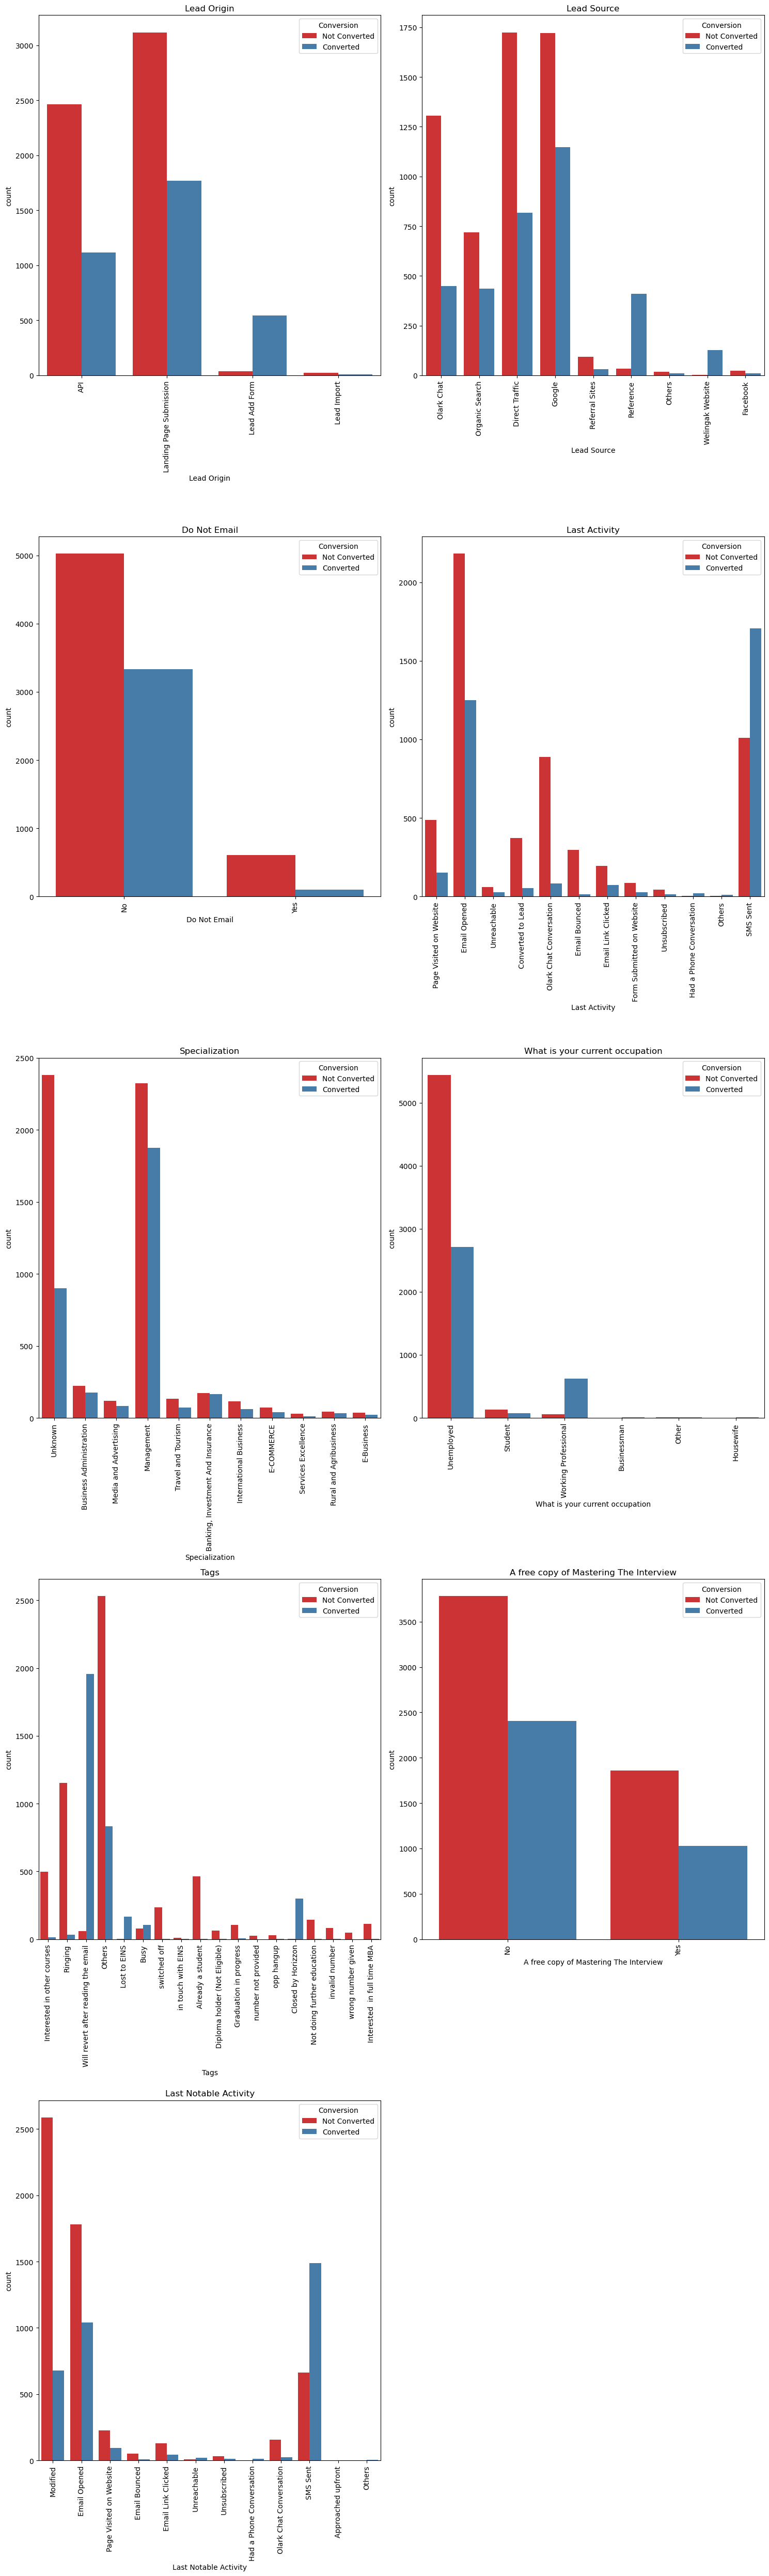

In [47]:
# Create plots
num_plots = len(allcatergories_list)
num_rows = (num_plots - 1) // 2 + 1
num_cols = min(2, num_plots)


plt.figure(figsize=(15, 10 * num_rows))


for i, category in enumerate(allcatergories_list):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=category, hue="Converted", data=Leads_data, palette="Set1")
    plt.xticks(rotation=90)
    plt.title(category)
    plt.legend(title="Conversion", labels=["Not Converted", "Converted"], loc="upper right")
    
plt.subplots_adjust(hspace=2) 
plt.tight_layout()
plt.show()

Insights:
- "Lead Origen": 
Most people selected either API or Landing page submission. Lead Add Form has a high Lead conversion rate.


- "Lead Source": 
In the majority of categories the numbers for non converters are higher with Direct Traffic and Google being the most freuquent. This is differnt for Reference and Welingak Website that have high Lead conversion.


- "Do Not Email":
Most people chose do not email. In both cases, the number of non convreters is higher than for converters.


- "Last Activity":
The most frequent columns are Modified and Email Opend. The majority of columns also shows that more non-converteres aree present in comparision to converters.SMS Sent and had a Phone Conversation have high Lead conversion.


- "Specialization":
Most leads either have a management or an unknown specialization. Specialization does not appear to contribute to high Lead conversation


- "What is your current occupation":
Most leads are unemployed. Working Professional has a high Lead conversation.


- "Tags":
Will revert after reding the email is the most frequent category. Will revert after reding the email, Lost to EINS, Busy and Closed by Horizon have high Lead conversion


- "A free copy of mastering the interview":
Most leads do not take a dree copy of Mastering the interview. The category does not appear to contribute to high Lead conversation.


- "Last notable Activity"
Most leads fall into the category modified or email opened. SMS Sent has a high Lead conversion.

#### 3.2.2 Numerical continous Columns

#### 3.2.2.1 Graphs

In [48]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,No,Modified


In [49]:
# Plot all the non categorical columns
allcontinous_list=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

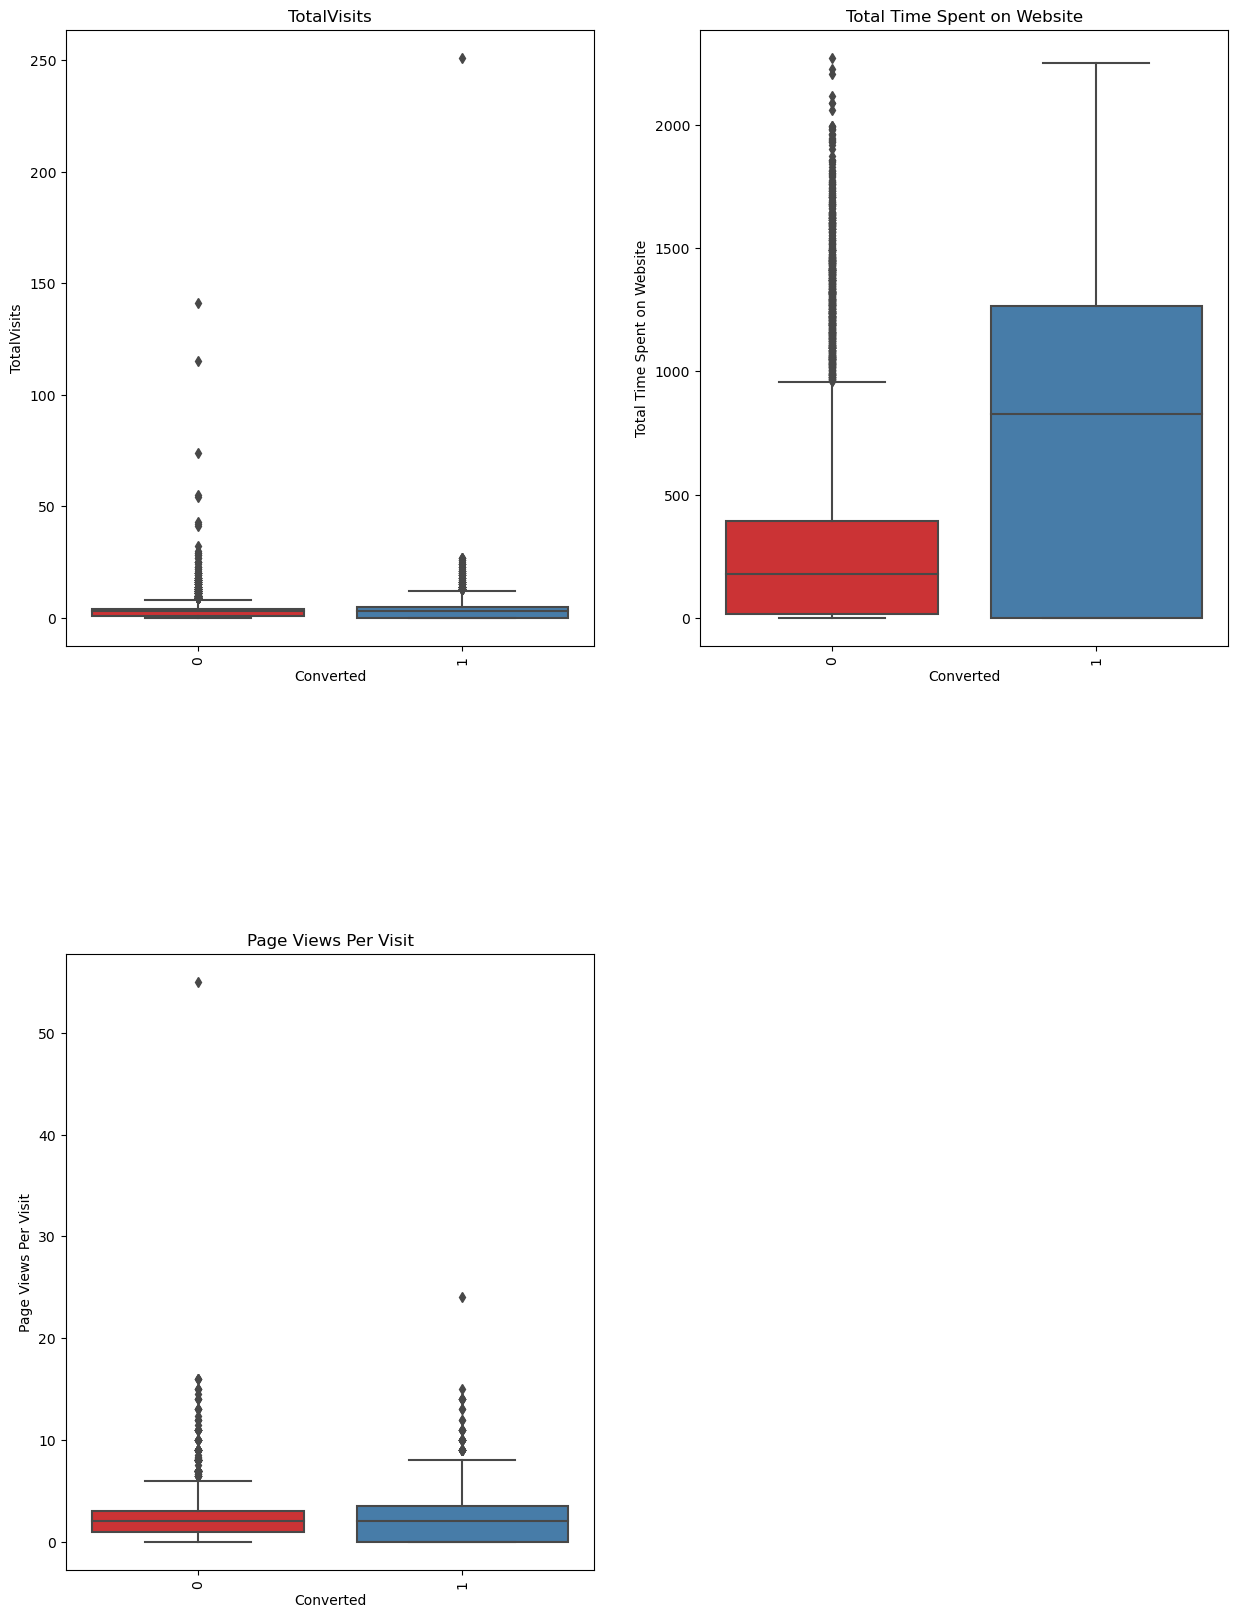

In [50]:
# Create plots
num_plots = len(allcontinous_list)
num_rows = (num_plots - 1) // 2 + 1
num_cols = min(2, num_plots)

plt.figure(figsize=(15, 10 * num_rows))

for i, category in enumerate(allcontinous_list):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x="Converted", y=category, data=Leads_data, orient="vert", palette="Set1")
    plt.xticks(rotation=90)
    plt.title(category)
    
plt.subplots_adjust(hspace=0.5)
plt.show()


Insights:

- "Total Vists": 
The median between converted and non converted is very similar. Outliers are present in the column.


- "Total Time Spent on Website":
Converters spent mor time on the website than non-converters. Outlires are largely continous


- "Page Views per Visit":
The median between converted and non converted is very similar. Outliers are present in the column.


#### 3.2.2.2 Outlier treatment of countinous variables

In [51]:
#Start with "TotalVisits"
Leads_data["TotalVisits"].describe(percentiles=[0.05,.1,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

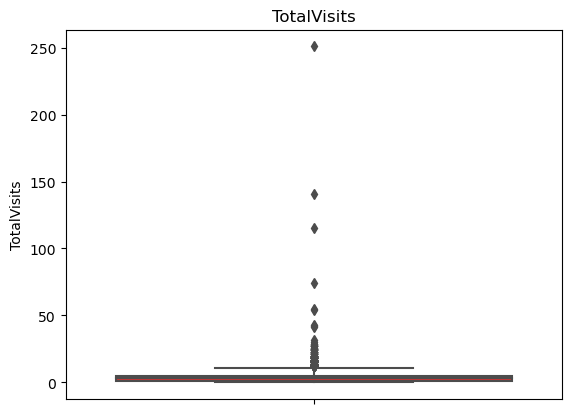

In [52]:
# Plot "TotalVisits"
sns.boxplot(y="TotalVisits", data=Leads_data, orient="vert", palette="Set1")
plt.xticks(rotation=90)
plt.title("TotalVisits")
    
plt.show()

In [53]:
# Remove outliers
percentile_99 = Leads_data["TotalVisits"].quantile(0.99)

# Remove values higher than the 99th percentile
Leads_data = Leads_data[Leads_data["TotalVisits"] <= percentile_99]


In [54]:
# Remove values higher than the first percentile
percentile_1 = Leads_data["TotalVisits"].quantile(0.01)
                          
Leads_data = Leads_data[Leads_data["TotalVisits"] >= percentile_1]

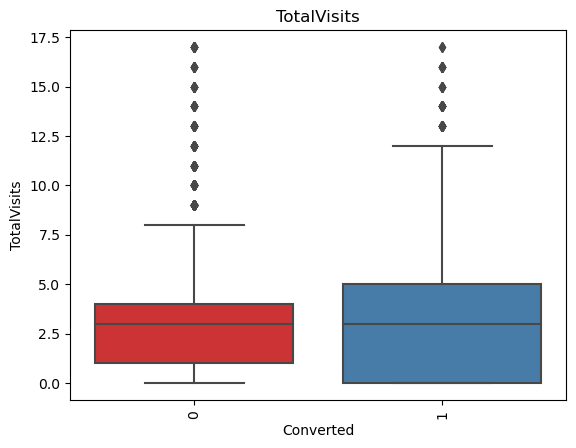

In [55]:
#Plot "TotalVisits"
sns.boxplot(x="Converted", y="TotalVisits", data=Leads_data, orient="vert", palette="Set1")
plt.xticks(rotation=90)
plt.title("TotalVisits")
    
plt.show()

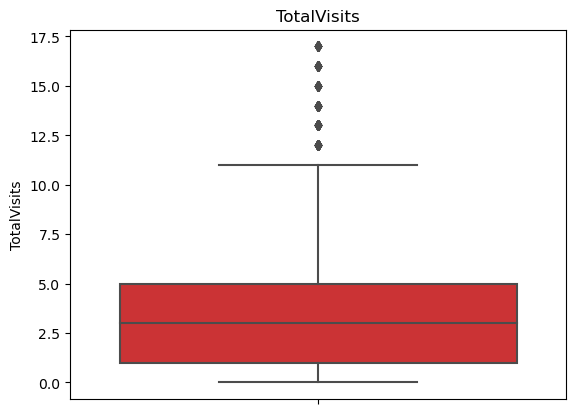

In [56]:
# Plot "TotalVisits"
sns.boxplot(y="TotalVisits", data=Leads_data, orient="vert", palette="Set1")
plt.xticks(rotation=90)
plt.title("TotalVisits")
    
plt.show()

In [57]:
# Start with "Total Time Spend on Website"
Leads_data["Total Time Spent on Website"].describe(percentiles=[0.05,.1,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
10%         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

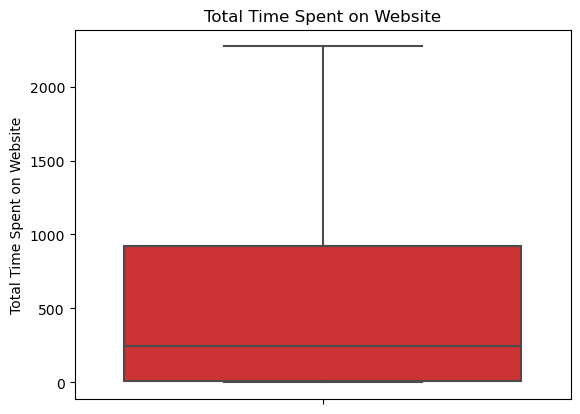

In [58]:
# Plot "Total Time Spent on Website"
sns.boxplot(y="Total Time Spent on Website", data=Leads_data, orient="vert", palette="Set1")
plt.xticks(rotation=90)
plt.title("Total Time Spent on Website")
    
plt.show()

Column looks fine, no need to remove any data

In [59]:
# "Page Views Per Visit"
Leads_data["Page Views Per Visit"].describe(percentiles=[0.05,.1,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

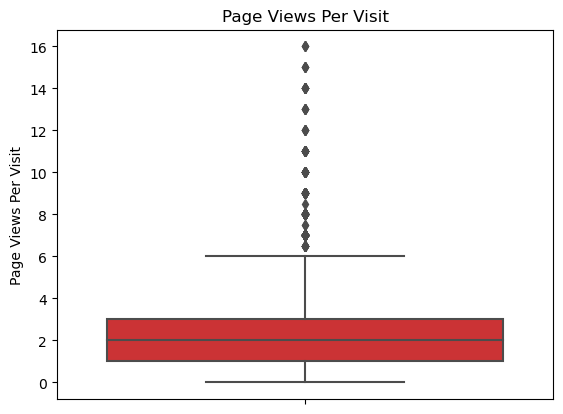

In [60]:
sns.boxplot(y="Page Views Per Visit", data=Leads_data, orient="vert", palette="Set1")
plt.xticks(rotation=90)
plt.title("Page Views Per Visit")
    
plt.show()

In [61]:
# Remove Outliers
percentile_99 = Leads_data["Page Views Per Visit"].quantile(0.99)

# Remove values higher than the 99th percentile
Leads_data = Leads_data[Leads_data["Page Views Per Visit"] <= percentile_99]

In [62]:
# Remove values higher than the first percentile
percentile_1 = Leads_data["Page Views Per Visit"].quantile(0.01)
                          
Leads_data = Leads_data[Leads_data["Page Views Per Visit"] >= percentile_1]

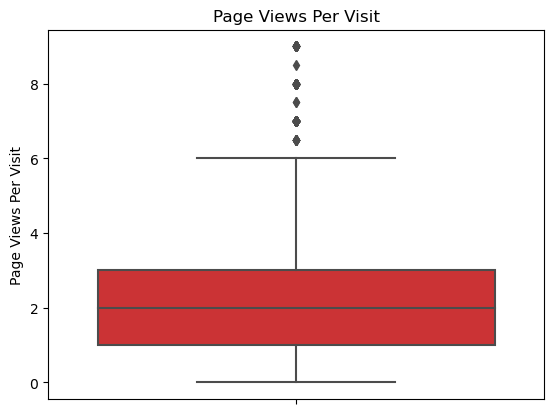

In [63]:
sns.boxplot(y="Page Views Per Visit", data=Leads_data, orient="vert", palette="Set1")
plt.xticks(rotation=90)
plt.title("Page Views Per Visit")
    
plt.show()

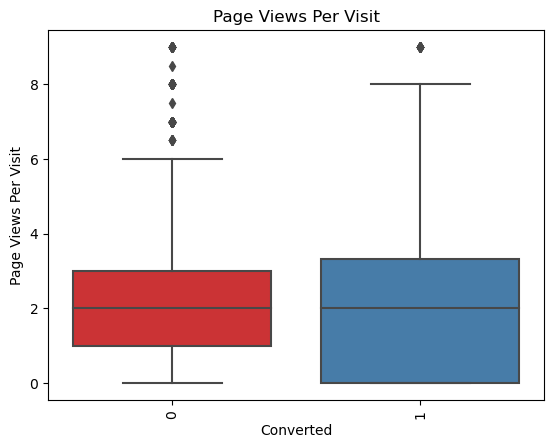

In [64]:
# Plot "TotalVisits"
sns.boxplot(x="Converted", y="Page Views Per Visit", data=Leads_data, orient='vert', palette='Set1')
plt.xticks(rotation=90)
plt.title("Page Views Per Visit")
    
plt.show()

## 4. Data Prep

### 4.1 Dummy 

In [65]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,No,Modified


In [66]:
# Binary variables
# List of variables to map

varlist =  ["Do Not Email", "A free copy of Mastering The Interview"]

# Defining the map function
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})

# Applying the function to the housing list
Leads_data[varlist] = Leads_data[varlist].apply(binary_map)

In [67]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,0,Modified


In [68]:
# For categorical variables with multiple levels, creating dummy variables
# drop "Other"/"Unknown" if present, otherwise drop first

# Start with "Lead Origin"

dummy = pd.get_dummies(Leads_data[["Lead Origin"]], drop_first=True)

Leads_data = pd.concat([Leads_data,dummy],1)

In [69]:
# "Tags"
Tags_category = pd.get_dummies(Leads_data["Tags"], prefix  = "Tags")
Tags_category = Tags_category.drop(["Tags_Others"], 1)
Leads_data = pd.concat([Leads_data, Tags_category], axis = 1)

In [70]:
# "Lead Source"
LeadSource_category = pd.get_dummies(Leads_data["Lead Source"], prefix  = "Lead Source")
LeadSource_category = LeadSource_category.drop(["Lead Source_Others"], 1)
Leads_data = pd.concat([Leads_data, LeadSource_category], axis = 1)

In [71]:
# "Last Activity"
LastActivity_category = pd.get_dummies(Leads_data["Last Activity"], prefix  = "Last Activity")
LastActivity_category = LastActivity_category.drop(["Last Activity_Others"], 1)
Leads_data = pd.concat([Leads_data, LastActivity_category], axis = 1)

In [72]:
# "Specialization"
specicalization_catgory = pd.get_dummies(Leads_data["Specialization"], prefix  = "Specialization")
specicalization_catgory = specicalization_catgory.drop(["Specialization_Unknown"], 1)
Leads_data = pd.concat([Leads_data, specicalization_catgory], axis = 1)

In [73]:
# "Whats is your current occupation"
occupation_category = pd.get_dummies(Leads_data["What is your current occupation"], prefix  = "What is your current occupation")
occupation_category = occupation_category.drop(["What is your current occupation_Other"], 1)
Leads_data = pd.concat([Leads_data, occupation_category], axis = 1)

In [74]:
# "Last Notable Activity"
NActivity_category = pd.get_dummies(Leads_data["Last Notable Activity"], prefix  = "Last Notable Activity")
NActivity_category = NActivity_category.drop(["Last Notable Activity_Others"], 1)
Leads_data = pd.concat([Leads_data, NActivity_category], axis = 1)

In [75]:
#dropping original variables
Leads_data = Leads_data.drop(["Do Not Email", "A free copy of Mastering The Interview","Lead Origin", "Lead Source",
                             "Last Activity","Specialization","What is your current occupation",
                              "Last Notable Activity","Tags" ], 1)

In [76]:
pd.set_option('display.max_columns', None)
Leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [77]:
Leads_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8924 non-null   int64  
 1   TotalVisits                                           8924 non-null   float64
 2   Total Time Spent on Website                           8924 non-null   int64  
 3   Page Views Per Visit                                  8924 non-null   float64
 4   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 6   Lead Origin_Lead Import                               8924 non-null   uint8  
 7   Tags_Already a student                                8924 non-null   uint8  
 8   Tags_Busy                                             8924

### 4.2 Splitting data into train and test

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variable to X
X = Leads_data.drop(["Converted"], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [80]:
# Putting response variable to y
y = Leads_data["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

### 4.3 Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1668,1.318791,1.539392,-0.274220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3277,0.631616,-0.602957,-0.316424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4079,0.288028,1.792079,0.912772,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3680,-0.055559,-0.628592,-0.406108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9132,4.754668,-0.659720,0.295536,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


### 4.4. Correlations

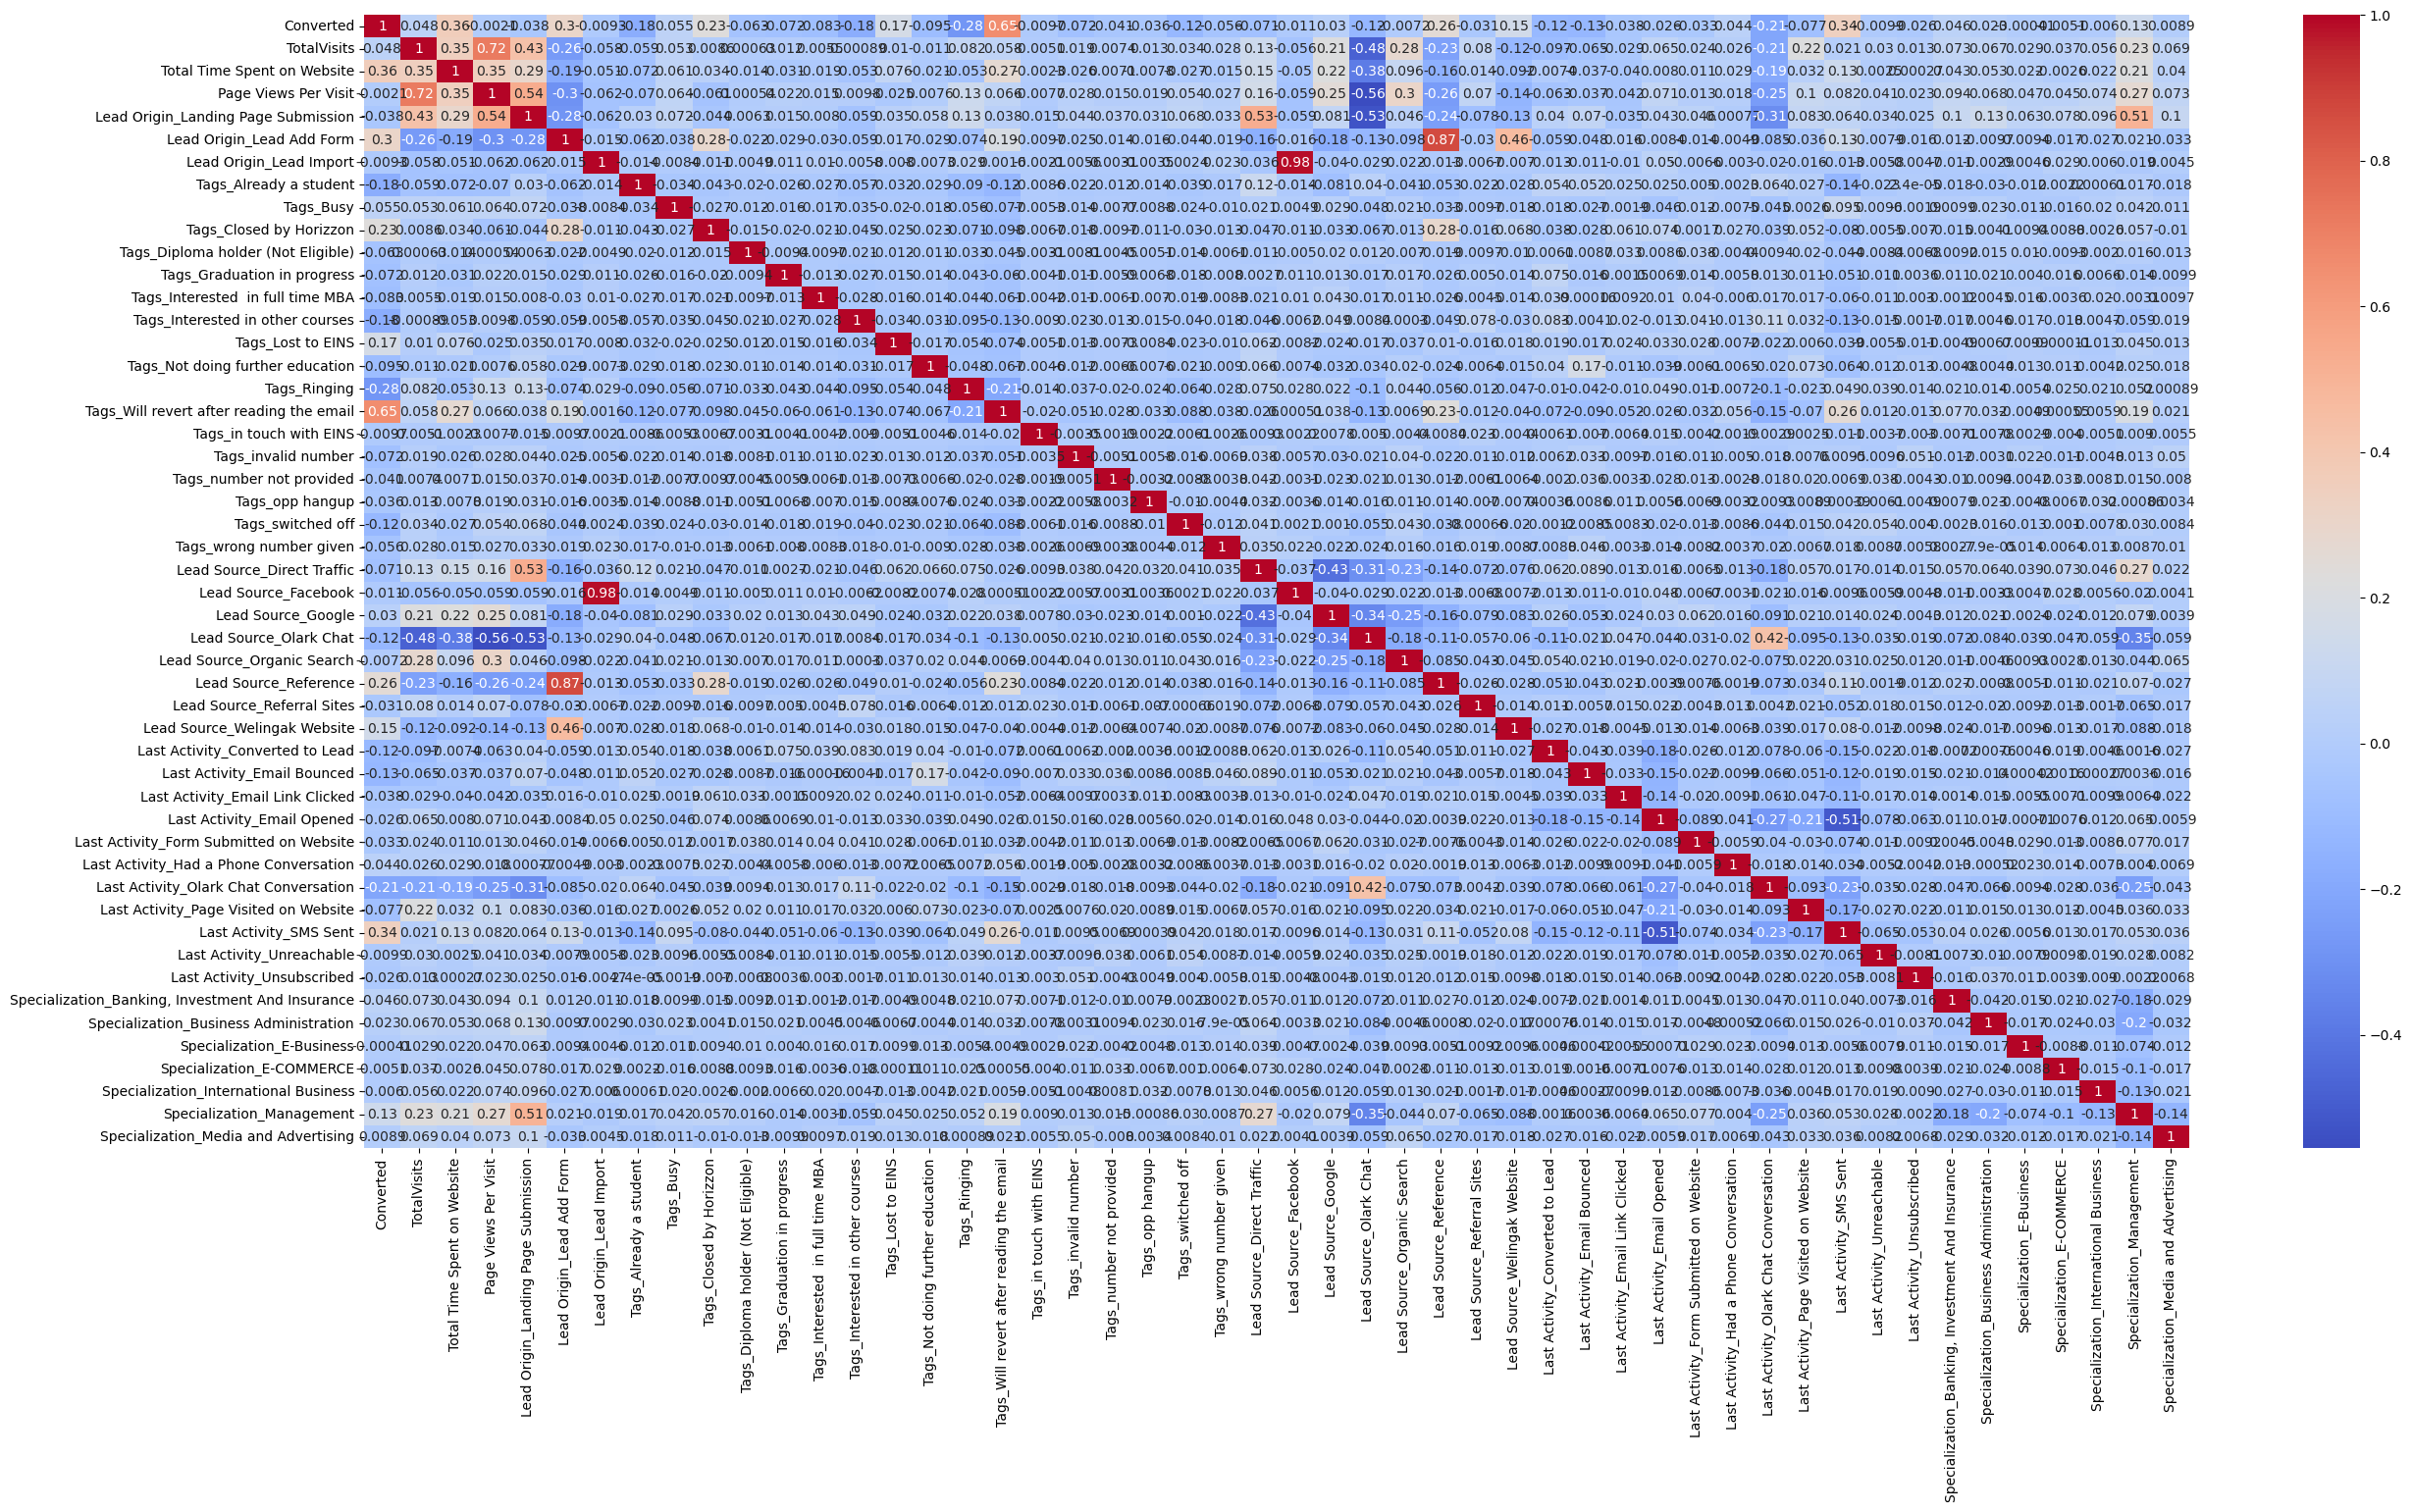

In [84]:
# create correlation matrix to see colinerarity between variables
# split into 2 as theree are many variiabels

plt.figure(figsize = (30,15))   
sns.heatmap(Leads_data.iloc[:,:50].corr(), cmap="coolwarm", annot=True)
plt.show()

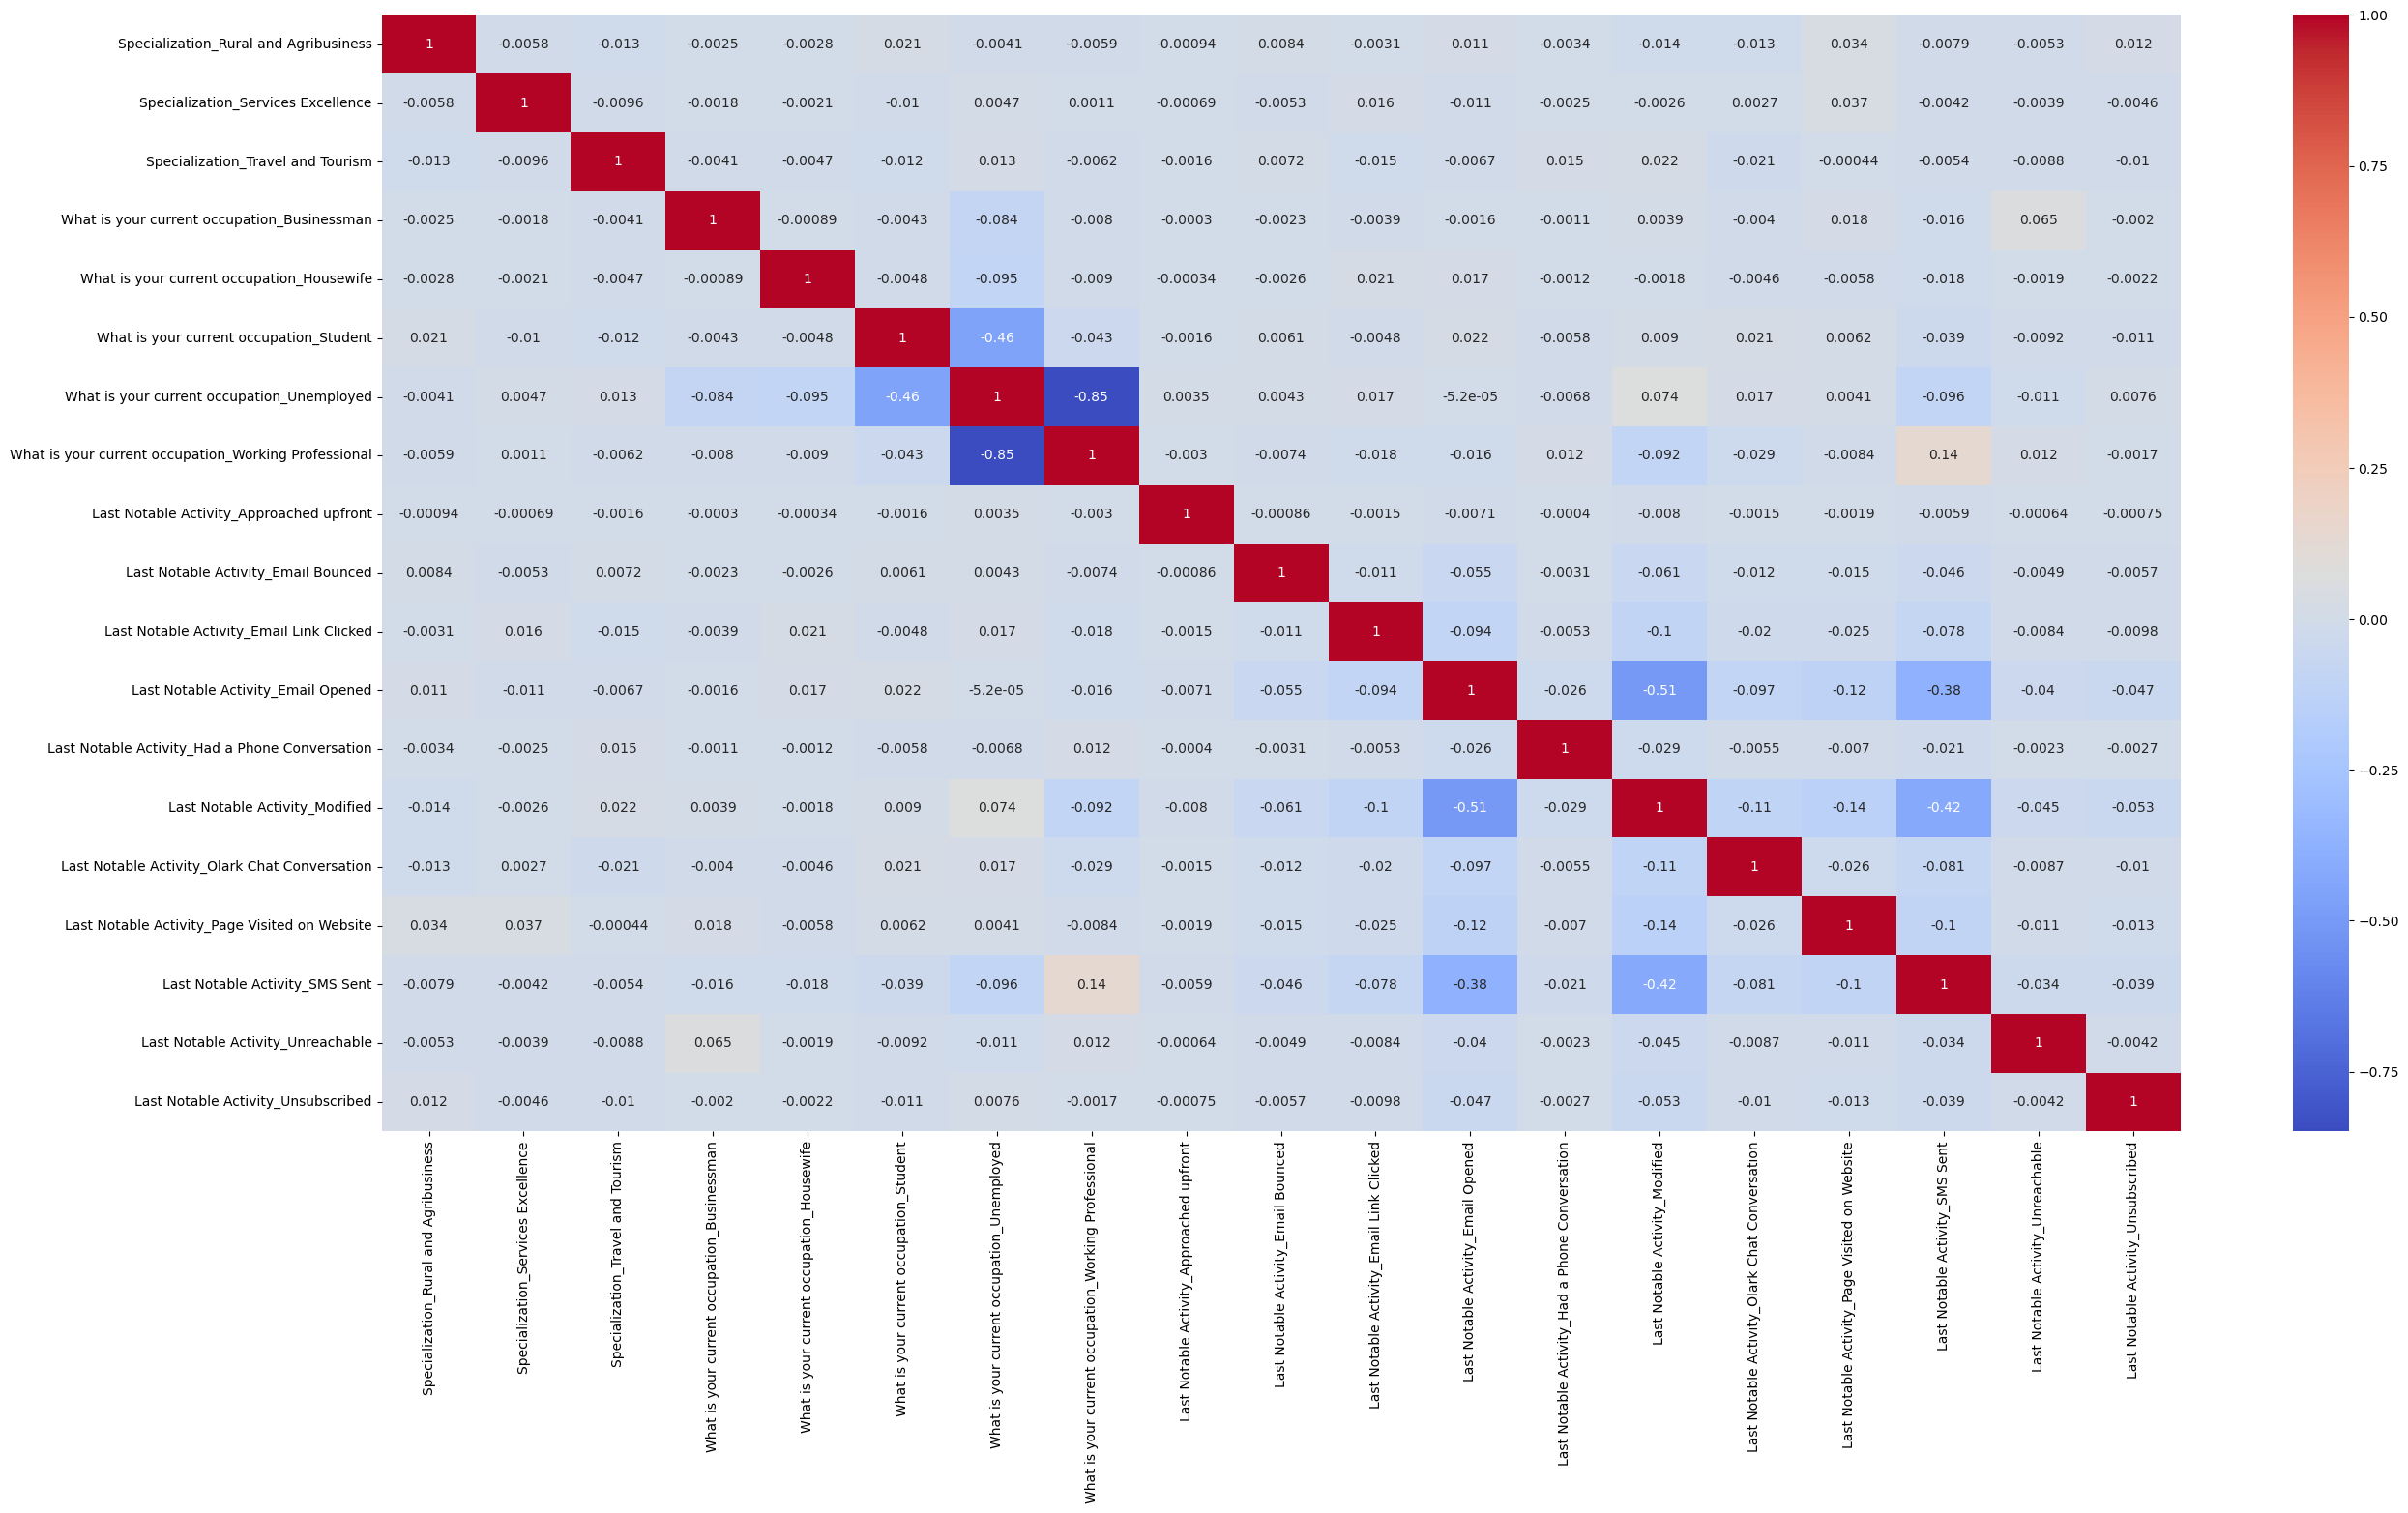

In [85]:
plt.figure(figsize = (30,15)) 
sns.heatmap(Leads_data.iloc[:,50:].corr(),  cmap="coolwarm", annot=True)
plt.show()

Insights:
- There is significant collinearity between "What is your current occupation_Unemployed" and "What is your current occupation_Working professional" features.
- Similarly, "Lead Source_facebook" and "Lead Origin_Lead Import" exhibit high collinearity.
- Additionally, "Lead Source_Reference" and "Lead Source_Reference" also display noticeable collinearity.

In [86]:
#Dropping highly correlated variables
Leads_data=Leads_data.drop(columns=["What is your current occupation_Unemployed","Lead Origin_Lead Import","Lead Source_Reference"])

In [87]:
Leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 5. Building the Model

### 5.1. Statsmodels

In [88]:
import statsmodels.api as sm

In [89]:
np.asarray(y_train)

array([0, 0, 0, ..., 0, 1, 0])

In [90]:
# Logistic regression model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6178
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 11 Aug 2023   Deviance:                       73775.
Time:                        16:07:40   Pearson chi2:                 3.61e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -4.114e+14    4.4e+07  -9.36e+06      0.000   -4.11e+14   -4.11e+14
TotalVisits                                           6.516e+13   1.34e+06   4.85e+07      0.000    6.52e+13    6.52e+13
Total Time Spent on Website                           2.968e+14   1.04e+06   2.86e+08      0.000    2.97e+14    2.97e+14
Page Views Per Visit                                 -7.678e+13   1.46e+06  -5.26e+07      0.000   -7.68e+13   -7.68e+13
Lead Origin_Landing Page Submission                  -1.133e+14   3.44e+06  -3.29e+07      0.000   -1.13e+14   -1.13e+14
Lead Origin_Lead Add Form                            -1.205e+14   3.08e+07  -3.91e+06      0.000    -1.2e+14    -1.2e+14
Lead Origin_Lead Import                               9.393e+13   1.13e+07    8.3e+06      0.000    9.39e+13    9.39e+13
Tags_Already a student                               -9.012e+14   4.36e+06  -2.07e+08      0.000   -9.01e+14   -9.01e+14
Tags_Busy                                            -1.201e+15   6.23e+06  -1.93e+08      0.000    -1.2e+15    -1.2e+15
Tags_Closed by Horizzon                               7.583e+14   5.47e+06   1.39e+08      0.000    7.58e+14    7.58e+14
Tags_Diploma holder (Not Eligible)                   -9.815e+14   1.02e+07  -9.65e+07      0.000   -9.82e+14   -9.82e+14
Tags_Graduation in progress                          -5.612e+14   7.85e+06  -7.15e+07      0.000   -5.61e+14   -5.61e+14
Tags_Interested  in full time MBA                    -5.963e+14   7.71e+06  -7.74e+07      0.000   -5.96e+14   -5.96e+14
Tags_Interested in other courses                     -8.673e+14      4e+06  -2.17e+08      0.000   -8.67e+14   -8.67e+14
Tags_Lost to EINS                                     9.302e+14   6.61e+06   1.41e+08      0.000     9.3e+14     9.3e+14
Tags_Not doing further education                     -4.146e+15   6.83e+06  -6.07e+08      0.000   -4.15e+15   -4.15e+15
Tags_Ringing                                         -1.836e+15    2.9e+06  -6.33e+08      0.000   -1.84e+15   -1.84e+15
Tags_Will revert after reading the email              1.334e+15   2.83e+06   4.72e+08      0.000    1.33e+15    1.33e+15
Tags_in touch with EINS                               3.379e+14   1.95e+07   1.74e+07      0.000    3.38e+14    3.38e+14
Tags_invalid number                                  -1.652e+15   8.76e+06  -1.89e+08      0.000   -1.65e+15   -1.65e+15
Tags_number not provided                             -3.984e+15   1.61e+07  -2.47e+08      0.000   -3.98e+15   -3.98e+15
Tags_opp hangup                                      -7.915e+14   1.59e+07  -4.97e+07      0.000   -7.91e+14   -7.91e+14
Tags_switched off                                    -1.64

### 5.2. Feature selection with RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 31),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 33),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', False, 21),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Diploma holder (Not Eligible)', False, 3),
 ('Tags_Graduation in progress', False, 20),
 ('Tags_Interested  in full time MBA', False, 2),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Not doing further education', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_in touch with EINS', False, 38),
 ('Tags_invalid number', True, 1),
 ('Tags_number not provided', True, 1),
 ('Tags_opp hangup', False, 14),
 ('Tags_switched off', True, 1),
 ('Tags_wrong number given', True, 1),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', 

In [95]:
col = X_train.columns[rfe.support_]

In [96]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Tags_Busy',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_in touch with EINS',
       'Tags_opp hangup', 'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Specializati

In [97]:
# model 1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.5
Date:                Fri, 11 Aug 2023   Deviance:                       2843.1
Time:                        16:07:43   Pearson chi2:                 9.85e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5824
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2634      0.072    -17.491      0.000      -1.405      -1.122
Tags_Already a student                           -2.8018      0.585     -4.787      0.000      -3.949      -1.655
Tags_Closed by Horizzon                           7.1548      0.721      9.930      0.000       5.743       8.567
Tags_Interested in other courses                 -2.0393      0.426     -4.785      0.000      -2.875      -1.204
Tags_Lost to EINS                                 5.8440      0.525     11.130      0.000       4.815       6.873
Tags_Not doing further education                -23.6203   1.93e+04     -0.001      0.999   -3.79e+04    3.78e+04
Tags_Ringing                                     -3.2920      0.221    -14.908      0.000      -3.725      -2.859
Tags_Will revert after reading the email          4.6722      0.172     27.100      0.000       4.334       5.010
Tags_invalid number                              -3.9303      1.022     -3.847      0.000      -5.933      -1.928
Tags_number not provided                        -25.0199   4.49e+04     -0.001      1.000    -8.8e+04     8.8e+04
Tags_switched off                                -4.3456      0.720     -6.031      0.000      -5.758      -2.933
Tags_wrong number given                         -25.4614   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
Lead Source_Welingak Website                      4.3516      0.740      5.878      0.000       2.901       5.803
Last Activity_SMS Sent                            2.0672      0.107     19.362      0.000       1.858       2.277
Last Notable Activity_Modified                   -1.8852      0.119    -15.847      0.000      -2.118      -1.652
Last Notable Activity_Olark Chat Conversation    -1.6158      0.418     -3.866      0.000      -2.435      -0.797
=================================================================================================================
"""

In [98]:
# Remove Tags_Already a student due to heigh p-value
col = col.drop("Tags_number not provided",1)

In [99]:
# model 2
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1429.4
Date:                Fri, 11 Aug 2023   Deviance:                       2858.7
Time:                        16:07:43   Pearson chi2:                 9.72e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5813
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2757      0.072    -17.674      0.000      -1.417      -1.134
Tags_Already a student                           -2.7914      0.585     -4.770      0.000      -3.938      -1.644
Tags_Closed by Horizzon                           7.1539      0.720      9.930      0.000       5.742       8.566
Tags_Interested in other courses                 -2.0279      0.426     -4.761      0.000      -2.863      -1.193
Tags_Lost to EINS                                 5.8436      0.525     11.132      0.000       4.815       6.872
Tags_Not doing further education                -23.6082   1.93e+04     -0.001      0.999   -3.79e+04    3.79e+04
Tags_Ringing                                     -3.2660      0.220    -14.812      0.000      -3.698      -2.834
Tags_Will revert after reading the email          4.6784      0.172     27.179      0.000       4.341       5.016
Tags_invalid number                              -3.9040      1.021     -3.822      0.000      -5.906      -1.902
Tags_switched off                                -4.3189      0.720     -5.996      0.000      -5.731      -2.907
Tags_wrong number given                         -25.4352   3.49e+04     -0.001      0.999   -6.85e+04    6.84e+04
Lead Source_Welingak Website                      4.3632      0.740      5.897      0.000       2.913       5.813
Last Activity_SMS Sent                            2.0503      0.106     19.308      0.000       1.842       2.258
Last Notable Activity_Modified                   -1.8700      0.119    -15.753      0.000      -2.103      -1.637
Last Notable Activity_Olark Chat Conversation    -1.6046      0.418     -3.837      0.000      -2.424      -0.785
=================================================================================================================
"""

In [100]:
# Remove Last Activity_Had a Phone Conversation due to heigh p-value
col = col.drop("Tags_Not doing further education",1)

In [101]:
# model 3
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.4
Date:                Fri, 11 Aug 2023   Deviance:                       2886.8
Time:                        16:07:43   Pearson chi2:                 1.00e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5794
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3169      0.072    -18.311      0.000      -1.458      -1.176
Tags_Already a student                           -2.7487      0.585     -4.697      0.000      -3.896      -1.602
Tags_Closed by Horizzon                           7.2119      0.720     10.010      0.000       5.800       8.624
Tags_Interested in other courses                 -1.9864      0.426     -4.660      0.000      -2.822      -1.151
Tags_Lost to EINS                                 5.9012      0.525     11.241      0.000       4.872       6.930
Tags_Ringing                                     -3.2458      0.221    -14.718      0.000      -3.678      -2.814
Tags_Will revert after reading the email          4.7269      0.172     27.435      0.000       4.389       5.065
Tags_invalid number                              -3.8844      1.022     -3.802      0.000      -5.887      -1.882
Tags_switched off                                -4.2997      0.720     -5.969      0.000      -5.712      -2.888
Tags_wrong number given                         -23.4126   1.28e+04     -0.002      0.999   -2.51e+04    2.51e+04
Lead Source_Welingak Website                      4.4047      0.741      5.948      0.000       2.953       5.856
Last Activity_SMS Sent                            2.0762      0.106     19.618      0.000       1.869       2.284
Last Notable Activity_Modified                   -1.8910      0.118    -15.991      0.000      -2.123      -1.659
Last Notable Activity_Olark Chat Conversation    -1.5725      0.420     -3.740      0.000      -2.397      -0.748
=================================================================================================================
"""

In [102]:
# Remove What is your current occupation_Working Professional due to heigh p-value
col = col.drop("Tags_wrong number given",1)

In [103]:
# model 4
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.7
Date:                Fri, 11 Aug 2023   Deviance:                       2923.5
Time:                        16:07:43   Pearson chi2:                 9.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5770
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3352      0.072    -18.571      0.000      -1.476      -1.194
Tags_Already a student                           -2.7328      0.585     -4.670      0.000      -3.880      -1.586
Tags_Closed by Horizzon                           7.2024      0.720      9.999      0.000       5.791       8.614
Tags_Interested in other courses                 -1.9641      0.426     -4.616      0.000      -2.798      -1.130
Tags_Lost to EINS                                 5.8929      0.525     11.232      0.000       4.865       6.921
Tags_Ringing                                     -3.1794      0.220    -14.476      0.000      -3.610      -2.749
Tags_Will revert after reading the email          4.7345      0.172     27.584      0.000       4.398       5.071
Tags_invalid number                              -3.8167      1.021     -3.738      0.000      -5.818      -1.815
Tags_switched off                                -4.2308      0.720     -5.876      0.000      -5.642      -2.820
Lead Source_Welingak Website                      4.4264      0.739      5.987      0.000       2.977       5.876
Last Activity_SMS Sent                            2.0169      0.104     19.328      0.000       1.812       2.221
Last Notable Activity_Modified                   -1.8582      0.118    -15.795      0.000      -2.089      -1.628
Last Notable Activity_Olark Chat Conversation    -1.5555      0.421     -3.698      0.000      -2.380      -0.731
=================================================================================================================
"""

### 5.3 VIF

In [104]:
# Check for the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Tags_Closed by Horizzon,1.05
3,Tags_Lost to EINS,1.03
8,Lead Source_Welingak Website,1.03
7,Tags_switched off,1.02
6,Tags_invalid number,1.01
11,Last Notable Activity_Olark Chat Conversation,1.01
2,Tags_Interested in other courses,0.30
0,Tags_Already a student,0.17
5,Tags_Will revert after reading the email,0.11
10,Last Notable Activity_Modified,0.11


Insights: VIF values are all below 5. No further action is needed.

### 5.4 Predictions on train set

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1668    0.010829
3277    0.052614
4079    0.039415
3680    0.039415
9132    0.010829
6883    0.993989
6377    0.052614
6738    0.076020
6351    0.039415
7824    0.002662
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01082943, 0.05261384, 0.03941507, 0.03941507, 0.01082943,
       0.99398883, 0.05261384, 0.07601957, 0.03941507, 0.00266154])

In [108]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_Prob":y_train_pred})
y_train_pred_final["Prospect ID"] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.010829,1668
1,0,0.052614,3277
2,0,0.039415,4079
3,0,0.039415,3680
4,0,0.010829,9132


In [109]:
# Creating new column "Predicted" with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final["Predicted"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.010829,1668,0
1,0,0.052614,3277,0
2,0,0.039415,4079,0
3,0,0.039415,3680,0
4,0,0.010829,9132,0


In [110]:
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3687  184]
 [ 322 2053]]


In [112]:
# Predicted     not_converted    converted
# Actual
# not_cnverted        3687      184
# converted           322       2053  

In [113]:
# Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9189881524175473


### 5.5 Metrics beyond simply accuracy

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.864421052631579

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.9524670627744769

In [117]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.04753293722552312


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.9177469825659366


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9196807183836369


### 5.6 Plotting the ROC Curve

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

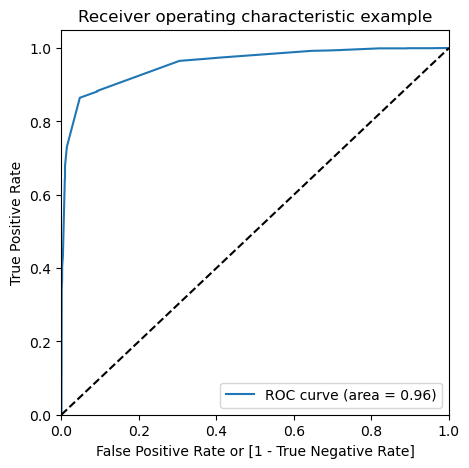

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### 5.7 Finding Optimal Cutoff Point

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010829,1668,0,1,0,0,0,0,0,0,0,0,0
1,0,0.052614,3277,0,1,0,0,0,0,0,0,0,0,0
2,0,0.039415,4079,0,1,0,0,0,0,0,0,0,0,0
3,0,0.039415,3680,0,1,0,0,0,0,0,0,0,0,0
4,0,0.010829,9132,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.797951  0.965053  0.695428
0.2   0.2  0.797951  0.965053  0.695428
0.3   0.3  0.918988  0.864421  0.952467
0.4   0.4  0.918988  0.864421  0.952467
0.5   0.5  0.918988  0.864421  0.952467
0.6   0.6  0.918988  0.864421  0.952467
0.7   0.7  0.888729  0.730105  0.986050
0.8   0.8  0.888409  0.729263  0.986050
0.9   0.9  0.871758  0.677895  0.990700


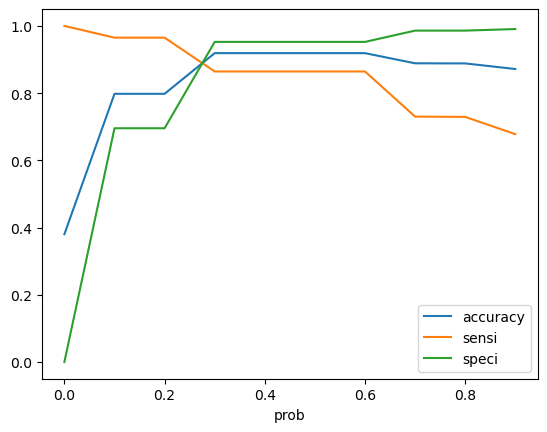

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x="prob", y=["accuracy","sensi","speci"])
plt.show()

From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [126]:
y_train_pred_final["final_predicted"] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.010829,1668,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.052614,3277,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.039415,4079,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.039415,3680,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.010829,9132,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
#assinging a score for each lead
y_train_pred_final["Score"] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[["Converted","Converted_Prob","Prospect ID","final_predicted","Score"]].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Score
0,0,0.010829,1668,0,1
1,0,0.052614,3277,0,5
2,0,0.039415,4079,0,4
3,0,0.039415,3680,0,4
4,0,0.010829,9132,0,1


In [128]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9189881524175473

In [129]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3687,  184],
       [ 322, 2053]])

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.864421052631579

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.9524670627744769

In [133]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.04753293722552312


In [134]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9177469825659366


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9196807183836369


### 5.8 Precision and Recall

In [136]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3687,  184],
       [ 322, 2053]])

In [137]:
# Precision TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9177469825659366

In [138]:
# Recall TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.864421052631579

Using sklearn utilities for the same

In [139]:
from sklearn.metrics import precision_score, recall_score

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9177469825659366

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.864421052631579

### 5.9 Precision and recall tradeoff

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6241    0
 6242    0
 6243    0
 6244    1
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6241    0
 6242    0
 6243    0
 6244    1
 6245    0
 Name: Predicted, Length: 6246, dtype: int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

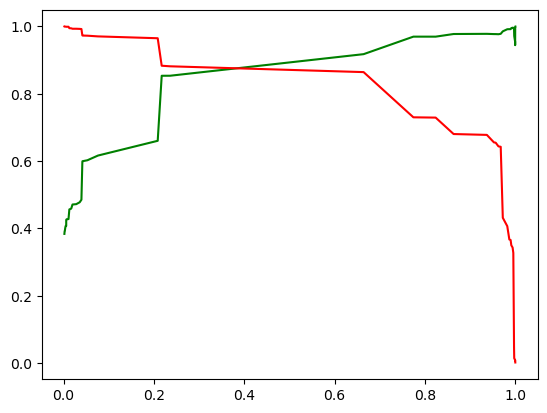

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.38 is the optimum point.

### 5.10 Making predictions on the test set

In [146]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [147]:
X_test = X_test[col]
X_test.head()

,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3446,0,0,0,0,0,1,0,0,0,0,1,0
6777,0,0,0,0,1,0,0,0,0,1,0,0
5223,0,0,0,0,0,0,0,0,0,1,0,0
6290,0,0,0,0,0,1,0,0,0,1,0,0
5113,0,0,1,0,0,0,0,0,0,0,1,0


In [148]:
X_test_sm = sm.add_constant(X_test)

In [149]:
y_test_pred = res.predict(X_test_sm)

In [150]:
y_test_pred[:10]

3446    0.823629
6777    0.076020
5223    0.664110
6290    0.995576
5113    0.005723
8480    0.208295
7875    0.052614
3358    0.208295
6005    0.936995
4525    0.995576
dtype: float64

In [151]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [152]:
# Let's see the head
y_pred_1.head()

,0
3446,0.823629
6777,0.076020
5223,0.664110
6290,0.995576
5113,0.005723


In [153]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [154]:
# Putting Prospect ID to index
y_test_df["Prospect ID"] = y_test_df.index

In [155]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [156]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [157]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3446,0.823629
1,0,6777,0.076020
2,1,5223,0.664110
3,1,6290,0.995576
4,0,5113,0.005723


In [158]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : "Converted_Prob"})

In [159]:
# Rearranging the columns
y_pred_final = y_pred_final[["Prospect ID", "Converted", "Converted_Prob"]]

In [160]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3446,1,0.823629
1,6777,0,0.076020
2,5223,1,0.664110
3,6290,1,0.995576
4,5113,0,0.005723


In [161]:
y_pred_final["final_predicted"] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [162]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3446,1,0.823629,1
1,6777,0,0.076020,0
2,5223,1,0.664110,1
3,6290,1,0.995576,1
4,5113,0,0.005723,0


In [163]:
# Assigning a score for each lead
y_pred_final = y_pred_final[["Prospect ID","Converted","Converted_Prob", "final_predicted"]]
y_pred_final["Score"] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Score
0,3446,1,0.823629,1,82
1,6777,0,0.076020,0,8
2,5223,1,0.664110,1,66
3,6290,1,0.995576,1,100
4,5113,0,0.005723,0,1


In [165]:
# Overall Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9275578790141897

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1618,   66],
       [ 128,  866]])

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Sensitivity
TP / float(TP+FN)

0.8712273641851107

In [169]:
# Specificity
TN / float(TN+FP)

0.9608076009501187

Summary of the Logistic Regression Model

### 6. Score between 1-100

In [174]:
# Summary of the scores assigned to each lead
Lead_Score=y_pred_final
Lead_Score.head(20)

,Prospect ID,Converted,Converted_Prob,final_predicted,Score
0,3446,1,0.823629,1,82
1,6777,0,0.076020,0,8
2,5223,1,0.664110,1,66
3,6290,1,0.995576,1,100
4,5113,0,0.005723,0,1
5,8480,0,0.208295,0,21
6,7875,0,0.052614,0,5
7,3358,0,0.208295,0,21
8,6005,1,0.936995,1,94
9,4525,1,0.995576,1,100


Insights:
- Lead scores are allocated to each lead, aiding in the identification of promising or "hot" leads. A higher score corresponds to a more favorable lead.

Short Summary:
- The model exhibits strong performance across metrics (Training: accuracy of 91.9% at a 0.28 cutoff, 86.4% sensitivity, and 95.2% specificity; Testing: overall accuracy of 92.8%, 87.1% sensitivity, and 96% specificity).
- The final formula, encompassing key variables for identifying hot leads, is as follows: Logit(P) = -1.3352 + 7.2024 * Tags_Closed by Horizzon + 5.8929 * Tags_Lost to EINS + 4.7345 * Tags_Will revert after reading the email + 4.4264 * Lead Source_Welingak Website + 2.0169 * Last Activity_SMS Sent - 1.5555 * Last Notable Activity_Olark Chat Conversation - 1.8582 * Last Notable Activity_Modified - 1.9641 * Tags_Interested in other courses - 2.7328 * Tags_Already a student - 3.1794 * Tags_Ringing - 3.8167 * Tags_invalid number - 4.2308 * Tags_switched off.
- Lead scores have been assigned to aid in predicting lead quality.
- By embracing these findings, the company could achieve the targeted conversion rate of over 80%.